# Data Mining Project: Spaceship  Titanic 

Welcome to the year 2912, where our data science skills are needed to solve a cosmic 
mystery. We have received a transmission from four light-years away, and things aren't 
looking good. The Spaceship Titanic was an interstellar passenger liner launched a 
month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage 
transporting emigrants from our solar system to three newly habitable exoplanets orbiting 
nearby stars. While heading towards its first destination, the scorching 55 Cancri E, the unsuspecting 
Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. 
Unfortunately, it met a fate similar to its namesake from 1000 years before. Although the ship 
remained intact, almost half of the passengers were transported to an alternate dimension!
With this challenge, we want to clusterize data in order to answers the question: “what sorts of 
people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
We want to analyze the data with a Python notebook to create clustering models and examine 
the received data. We will try to better understand the events that led to this cosmic situation 
and contribute to unraveling the mystery behind this space collision.
The goal is to determine which passenger has been Transported to another dimension or not.

We are going to develope the report in 3 chapters:

1) In the first chapter we will focus on the exploration of the dataset, the distribution of the different
   features and their relations. 

2) In the second one we will engage in feature engeneering, the filling of missing values and data preprocessing

3) In the third chapter we will perform clustering, and its validation with internal and external indexes. 
   Interpretation of the final results.
   


## Libraries

In [737]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [738]:
# Save to df
data = pd.read_csv('spaceship-titanic/train.csv')

label = data['Transported']

# Shape
print('Data shape:', data.shape)

Data shape: (8693, 14)


Now let's understand the data

In [739]:
data['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [740]:
data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

Delate Name

In [741]:
# remove Transported
data = data.drop(['Transported'], axis=1)

#remove Name
data = data.drop(['Name'], axis=1)

Let's focus on the properties of the numerical features

In [742]:
data.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/60273022.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



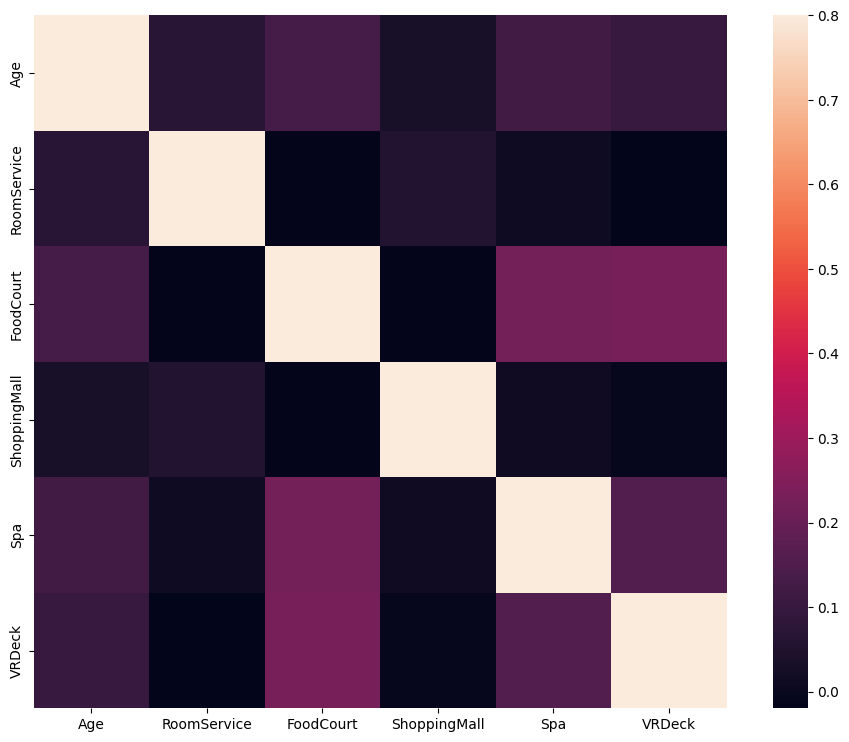

In [743]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


Here we create 2 lists with the name of categorical features and numerical features

In [744]:
num_features = []
cat_features = []

for i,f in enumerate(data.keys()):
    if data.dtypes[i] == 'float64':
        num_features.append(f)
    else:
        cat_features.append(f)


In [745]:
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [746]:
cat_features

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

## Numerical Features

In [747]:
data[num_features]

Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     39.0          0.0        0.0           0.0     0.0     0.0
1     24.0        109.0        9.0          25.0   549.0    44.0
2     58.0         43.0     3576.0           0.0  6715.0    49.0
3     33.0          0.0     1283.0         371.0  3329.0   193.0
4     16.0        303.0       70.0         151.0   565.0     2.0
...    ...          ...        ...           ...     ...     ...
8688  41.0          0.0     6819.0           0.0  1643.0    74.0
8689  18.0          0.0        0.0           0.0     0.0     0.0
8690  26.0          0.0        0.0        1872.0     1.0     0.0
8691  32.0          0.0     1049.0           0.0   353.0  3235.0
8692  44.0        126.0     4688.0           0.0     0.0    12.0

[8693 rows x 6 columns]

Age - The age of the passenger.

<Axes: xlabel='Age', ylabel='Count'>

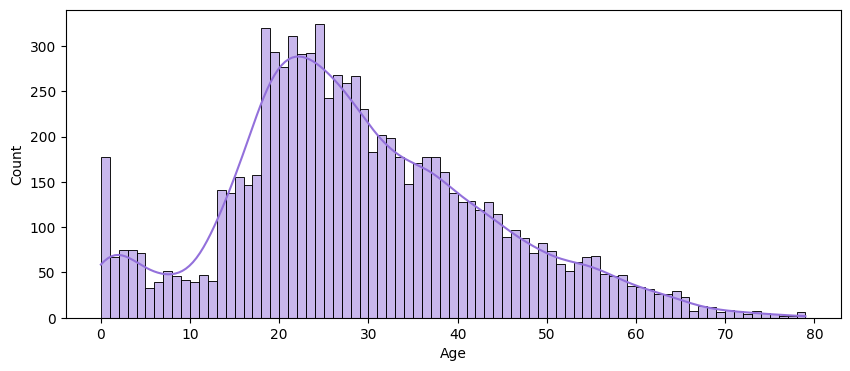

In [748]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Age', binwidth=1, kde=True, color='mediumpurple')

RoomService: The amount of money that tha passenger spent for RoomService  

<Axes: xlabel='RoomService', ylabel='Count'>

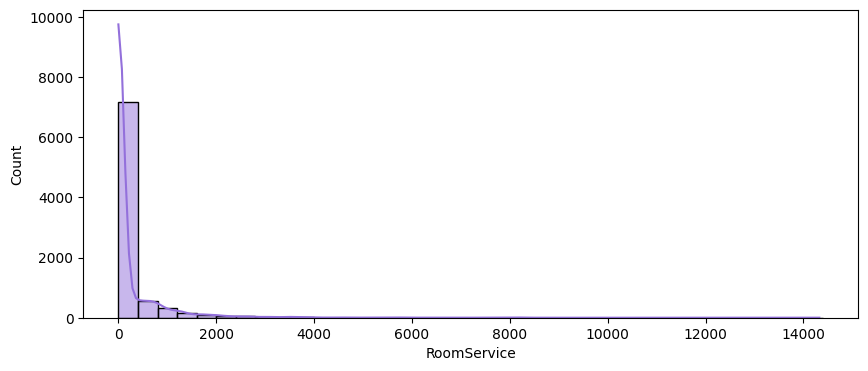

In [749]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='RoomService', binwidth=400, kde=True, color='mediumpurple')

FoodCourt: The amount of money that tha passenger spent for FoodCourt  

<Axes: xlabel='FoodCourt', ylabel='Count'>

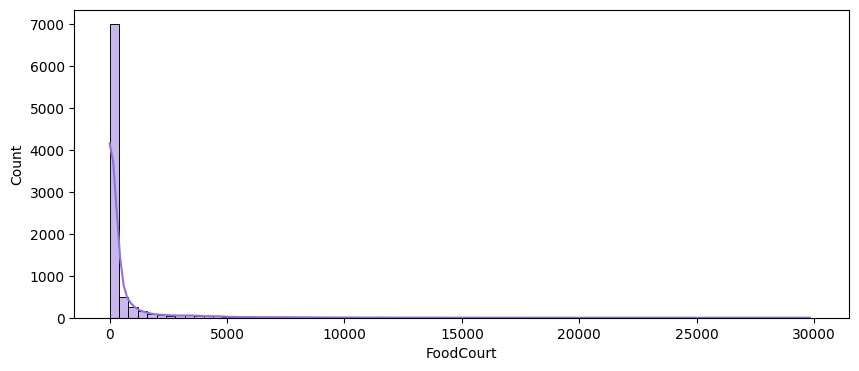

In [750]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='FoodCourt', binwidth=400, kde=True, color='mediumpurple')

ShoppingMall: The amount of money that tha passenger spent for ShoppingMall  

<Axes: xlabel='ShoppingMall', ylabel='Count'>

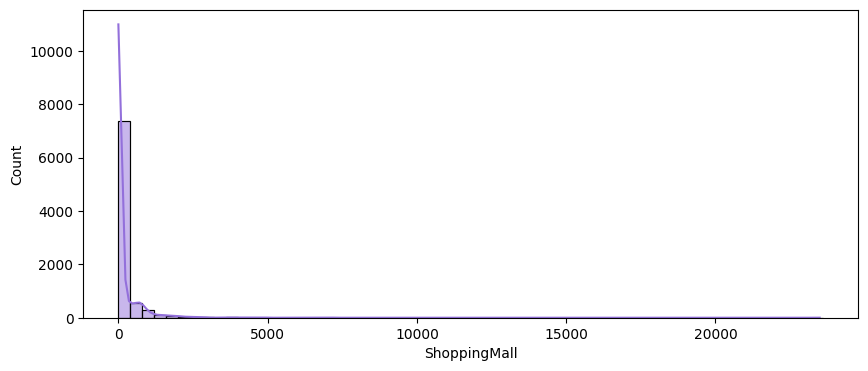

In [751]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='ShoppingMall', binwidth=400, kde=True, color='mediumpurple')

Spa: The amount of money that tha passenger spent for Spa  

<Axes: xlabel='Spa', ylabel='Count'>

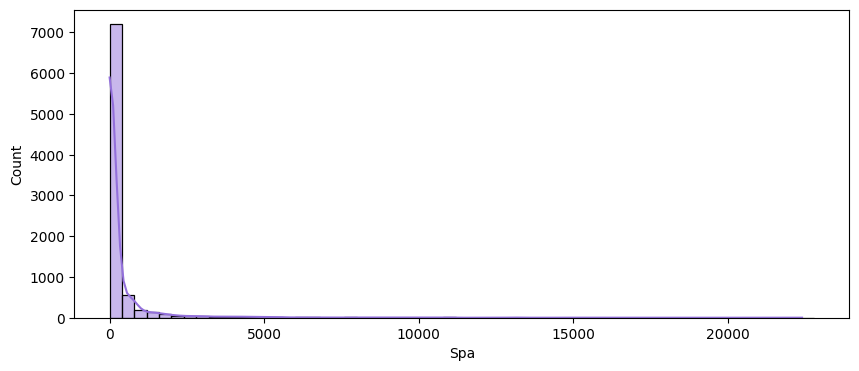

In [752]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Spa', binwidth=400, kde=True, color='mediumpurple')

VRDeck: The amount of money that tha passenger spent for VRDeck  

<Axes: xlabel='VRDeck', ylabel='Count'>

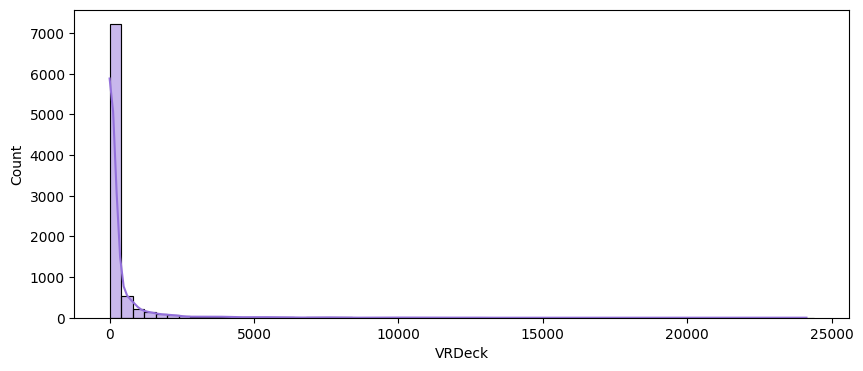

In [753]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='VRDeck', binwidth=400, kde=True, color='mediumpurple')

As we can clearly see, those features have the same distribution. 
From those plots we cannot say that the same group of people has spent the money in all the categories, but for the porpouse of this analysis we just care about the fact that those people have spent money.

to verify that we try to clusterize those features and see if there are results

In [754]:
services_features =['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [755]:
services = data[services_features]
services.head()

RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0          0.0        0.0           0.0     0.0     0.0
1        109.0        9.0          25.0   549.0    44.0
2         43.0     3576.0           0.0  6715.0    49.0
3          0.0     1283.0         371.0  3329.0   193.0
4        303.0       70.0         151.0   565.0     2.0

<Figure size 500x500 with 0 Axes>

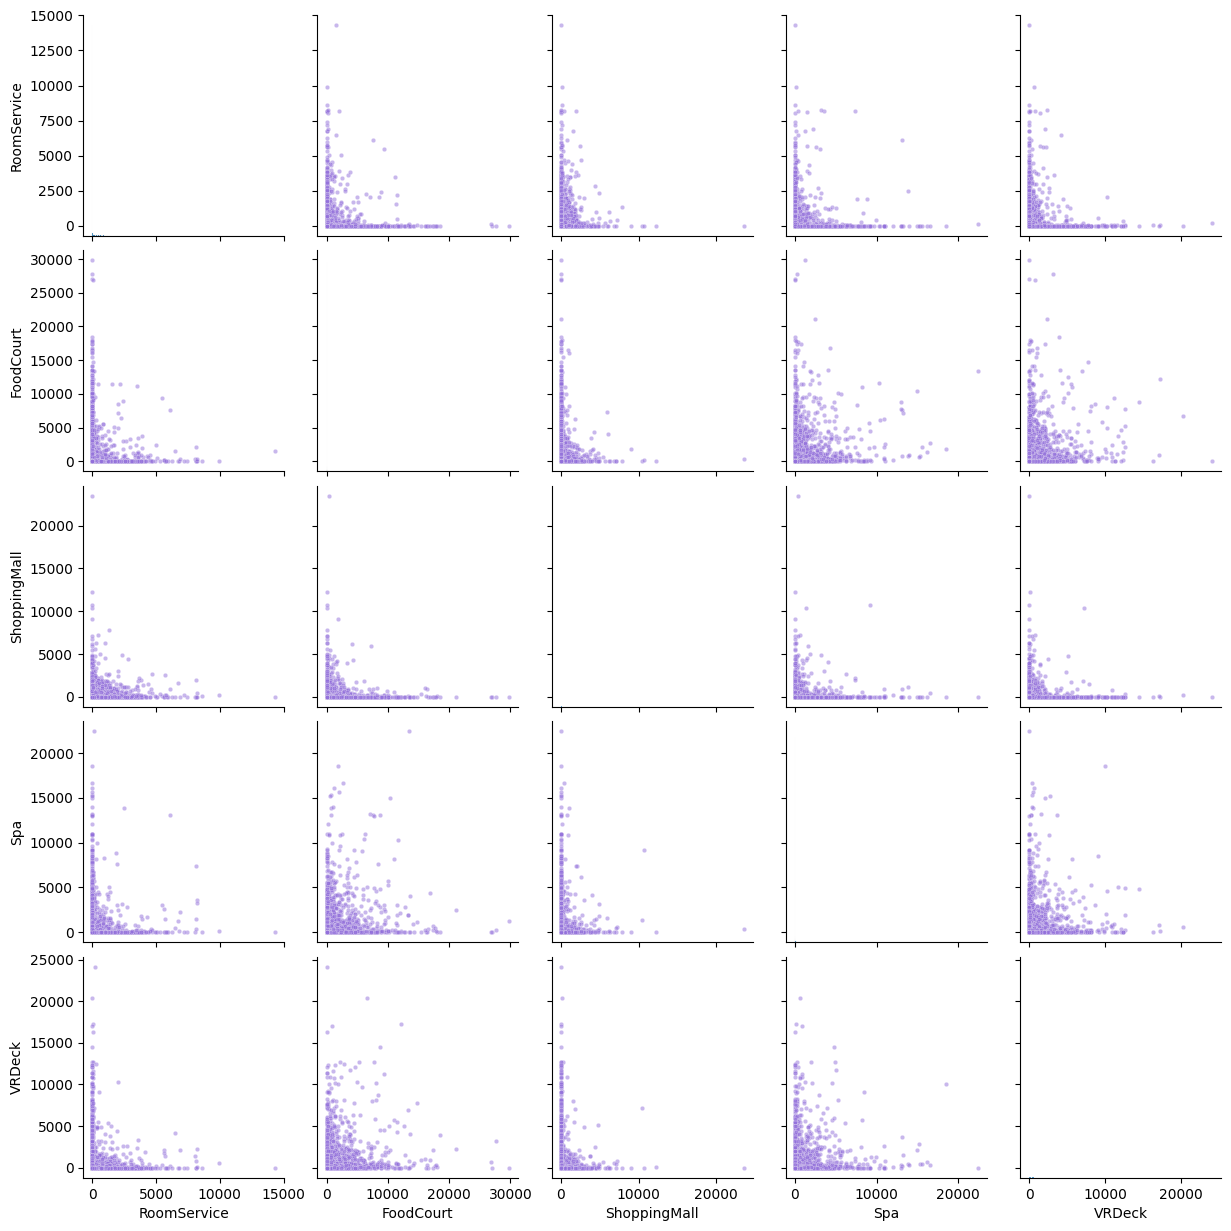

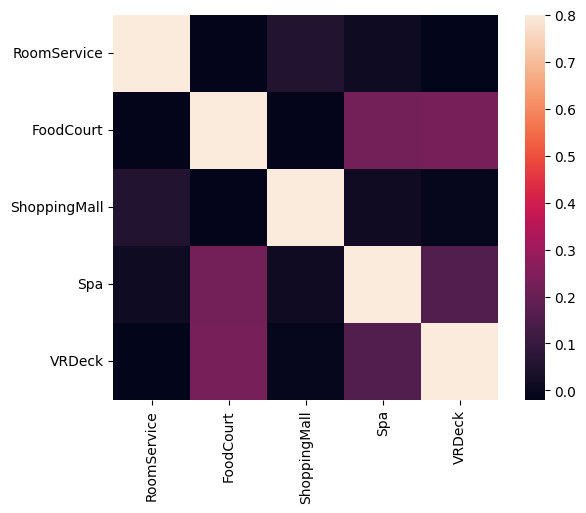

In [756]:
# # look the correlation of the features using subplots using seaborn
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(5,5))
sns.pairplot(services, vars= features, diag_kind="hist", plot_kws={'alpha':0.5, 's':10, 'color': 'mediumpurple'})
plt.show()


#plot correlation matrix
corrmat = services.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=.8, square=True);




## Categorical Features

* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

<Axes: xlabel='HomePlanet', ylabel='count'>

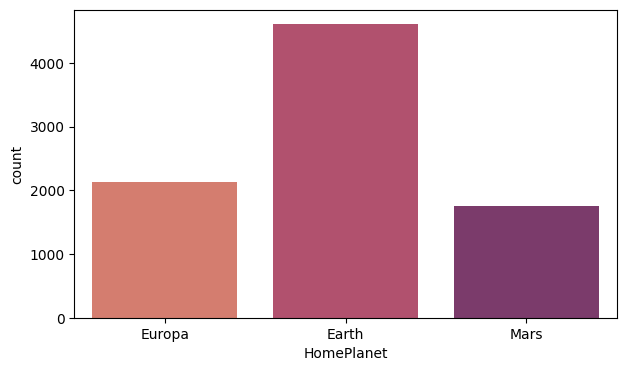

In [757]:
fig=plt.figure(figsize=(7,4))
palette = {0: "#9900b4", 1: "#0054b4", 2: "#b4004c"}

sns.countplot(data=data, x='HomePlanet', palette='flare')


 * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

<Axes: xlabel='CryoSleep', ylabel='count'>

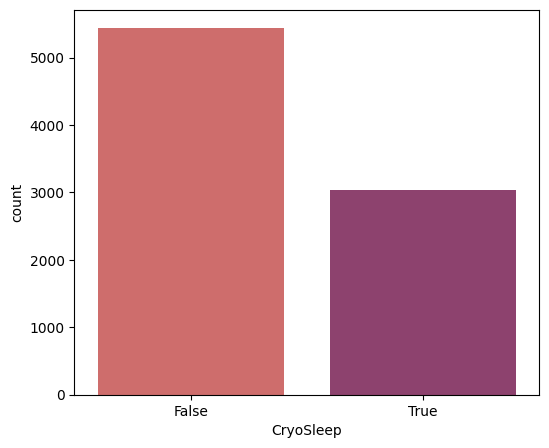

In [758]:
fig=plt.figure(figsize=(6,5))

sns.countplot(data=data, x='CryoSleep', palette='flare')


* **Destination** - The planet the passenger will be debarking to.

<Axes: xlabel='Destination', ylabel='count'>

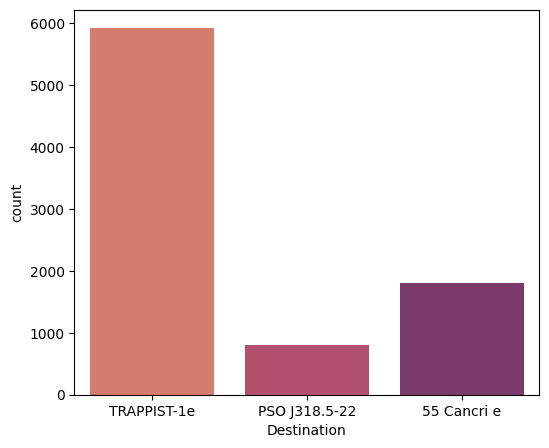

In [759]:
fig=plt.figure(figsize=(6,5))

sns.countplot(data=data, x='Destination', palette='flare')


 * **VIP** - Whether the passenger has paid for special VIP service during the voyage.

<Axes: xlabel='VIP', ylabel='count'>

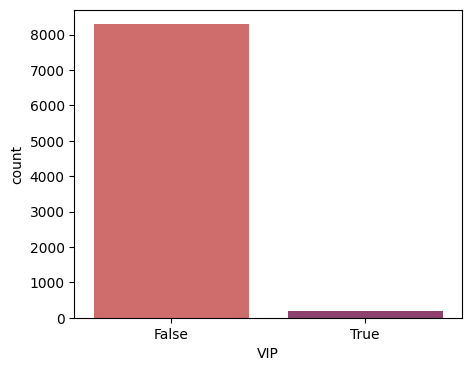

In [760]:
fig=plt.figure(figsize=(5,4))

sns.countplot(data=data, x='VIP', palette='flare')


In [761]:
cat_features

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

PassengerID

* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [762]:
data['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

[1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 4, 5, 6, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 

Text(0.5, 1.0, 'Group distribution')

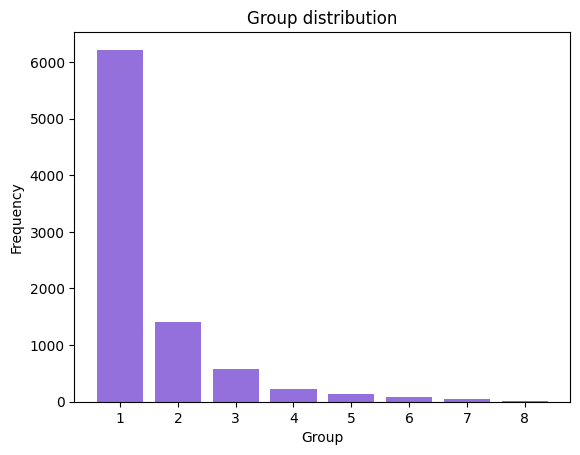

In [763]:
gruop, member = [],[]
for pID in data['PassengerId']:
    gruop.append(int(pID[0:4]))
    member.append(int(pID[5:7]))

fres, bins = np.histogram(member, np.linspace(0.5,8.5,9))
bins = [1,2,3,4,5,6,7,8]
print(member)
plt.bar(bins,fres,  color='mediumpurple')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Group distribution')

In [764]:
np.linspace(0.5,7.5,8)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

In [765]:
unique, counts = np.unique(gruop, return_counts=True)
unique

array([   1,    2,    3, ..., 9278, 9279, 9280])

<Figure size 1000x400 with 0 Axes>

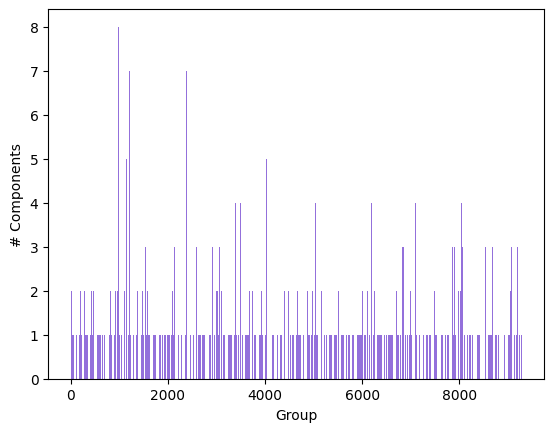

<Figure size 1000x400 with 0 Axes>

In [766]:
unique, counts = np.unique(gruop, return_counts=True)
plt.bar(unique,counts, color='mediumpurple')
plt.xlabel('Group')
plt.ylabel('# Components')

plt.figure(figsize = (10,4))


In [767]:
#now split the feature IdPassenger in two features, group and member
data['Group'] = gruop
data['Member'] = member
data.head()

# print(data['Member'].unique())


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Group  Member  
0          0.0        0.0           0.0     0.0     0.0      1       1  
1        109.0        9.0          25.0   549.0    44.0      2       1  
2         43.0     3576.0           0.0  6715.0    49.0      3       1  
3          0.0     1283.0         371.0  3329.0   193.0      3       2  
4        303.0       70.0         151.0   565.0     2.0      4       1

In [768]:
if 'PassengerId' in data.keys():
    data = data.drop(['PassengerId'], axis=1)

Cabin

* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [769]:
data['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [770]:
trys = 'E/608/S'
trys = trys.split('/')
trys

['E', '608', 'S']

In [771]:
cabin_dict = {
    'Deck': [],
    'Num': [],
    'Side': []
}
for c in data["Cabin"]:
    #split c by /
    if type(c) == float:
        cabin_dict['Deck'].append(np.nan)
        cabin_dict['Num'].append(np.nan)
        cabin_dict['Side'].append(np.nan)
        continue
    c = c.split('/')
    for i,let in enumerate('ABCDEFGT'):
        if c[0] == let:
            cabin_dict['Deck'].append(let)

    # cabin_dict['Deck'].append(c[0])
    cabin_dict['Num'].append(int(c[1]))

    for i,let in enumerate('SP'):
        if c[2] == let:
            cabin_dict['Side'].append(let)

# cabin_dict into dataframe
cabin_df = pd.DataFrame(cabin_dict)
cabin_df

Deck     Num Side
0       B     0.0    P
1       F     0.0    S
2       A     0.0    S
3       A     0.0    S
4       F     1.0    S
...   ...     ...  ...
8688    A    98.0    P
8689    G  1499.0    S
8690    G  1500.0    S
8691    E   608.0    S
8692    E   608.0    S

[8693 rows x 3 columns]

In [772]:
#check if nan values are in the dataframe
cabin_df.isnull().sum()

Deck    199
Num     199
Side    199
dtype: int64

In [773]:
color = [] 
for sid in cabin_dict['Side']:
    if sid == 'S':
        color.append('red')
    if sid == 'P':
        color.append('blue')

creo un dict temporaneo con valori numerici per fare il plot

In [774]:
num_cabin_df = {}

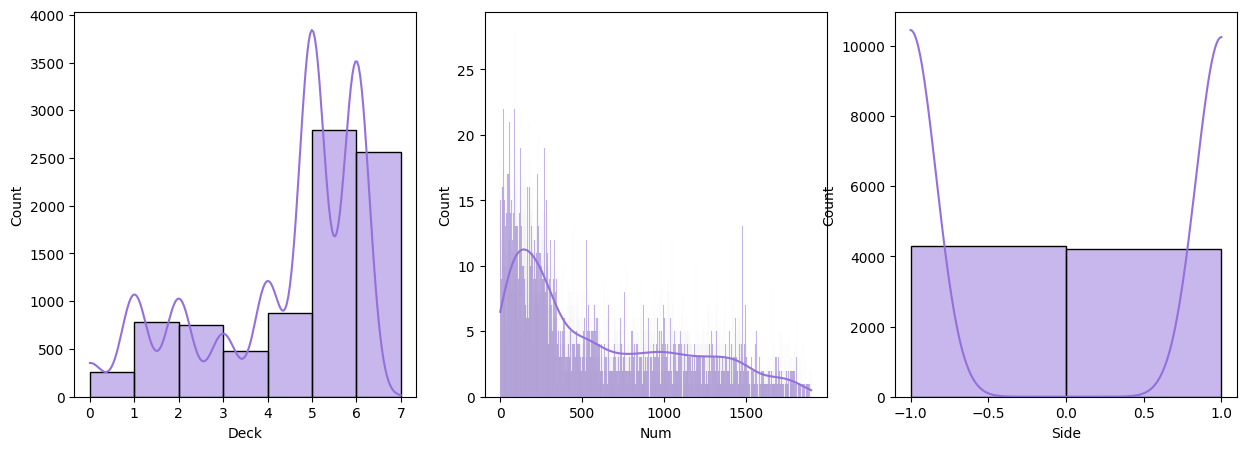

In [775]:
# Mappa le colonne non numeriche in valori numerici
num_cabin_df['Deck'] = cabin_df['Deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G':6, 'T':7})
num_cabin_df['Side'] = cabin_df['Side'].map({'S': -1, 'P': 1})
num_cabin_df['Num'] = cabin_df['Num']

# plot the distribution of the features using subplot(1,3)
fig, ax = plt.subplots(1,3, figsize=(15,5))

#plot frequency of the features Deck, Num and Side
sns.histplot(data=num_cabin_df, x='Deck', binwidth=1, kde=True, color='mediumpurple', ax=ax[0])
sns.histplot(data=num_cabin_df, x='Num', binwidth=1, kde=True, color='mediumpurple', ax=ax[1])
sns.histplot(data=num_cabin_df, x='Side', binwidth=1, kde=True, color='mediumpurple', ax=ax[2])
plt.show()




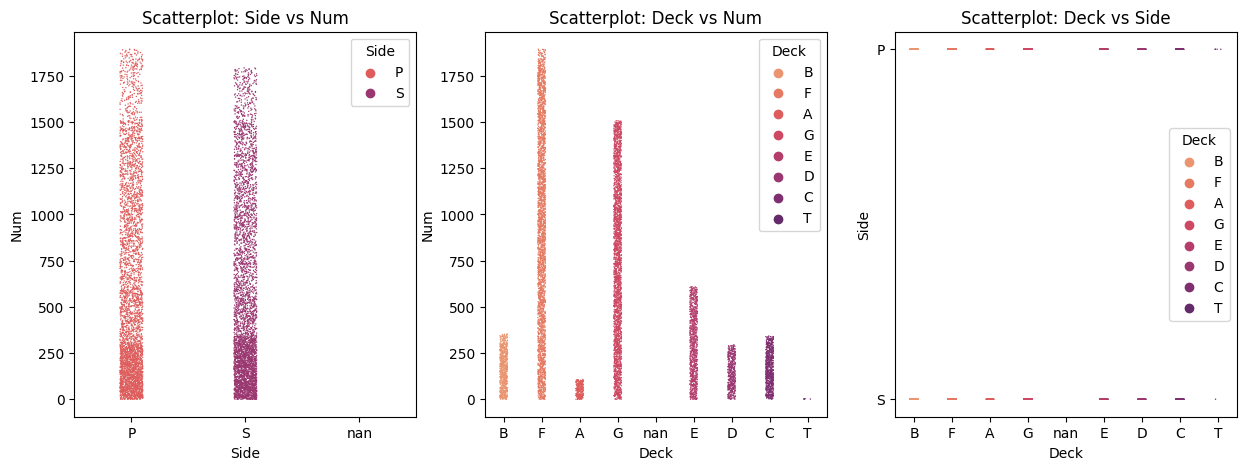

In [776]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.stripplot(data=cabin_df, x="Side", y="Num", ax=axes[0], s=1, hue='Side', palette='flare')
axes[0].set_title("Scatterplot: Side vs Num")

sns.stripplot(data=cabin_df, x="Deck", y="Num", ax=axes[1], s=1, hue='Deck', palette='flare')
axes[1].set_title("Scatterplot: Deck vs Num")

sns.stripplot(data=cabin_df, x="Deck", y="Side", ax=axes[2], s=1, hue='Deck', palette='flare')
axes[2].set_title("Scatterplot: Deck vs Side")

plt.show()

Merge the 2 dictionaries

In [777]:
# drop Cabin
if 'Cabin' in data.keys():
    data = data.drop(['Cabin'], axis=1)

In [778]:
# merge the two dataframe
data = pd.concat([data, cabin_df], axis=1)
data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Group  Member Deck  Num Side  
0           0.0     0.0     0.0      1       1    B  0.0    P  
1          25.0   549.0    44.0      2       1    F  0.0    S  
2           0.0  6715.0    49.0      3       1    A  0.0    S  
3         371.0  3329.0   193.0      3       2    A  0.0    S  
4         151.0   565.0     2.0      4       1    F  1.0    S

## New analysis for new features

In [779]:
for f in data.keys():
    print(f,type(data[f][0]))
    if type(data[f][0]) == float:
        print(f)

HomePlanet <class 'str'>
CryoSleep <class 'bool'>
Destination <class 'str'>
Age <class 'numpy.float64'>
VIP <class 'bool'>
RoomService <class 'numpy.float64'>
FoodCourt <class 'numpy.float64'>
ShoppingMall <class 'numpy.float64'>
Spa <class 'numpy.float64'>
VRDeck <class 'numpy.float64'>
Group <class 'numpy.int64'>
Member <class 'numpy.int64'>
Deck <class 'str'>
Num <class 'numpy.float64'>
Side <class 'str'>


/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/840795353.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



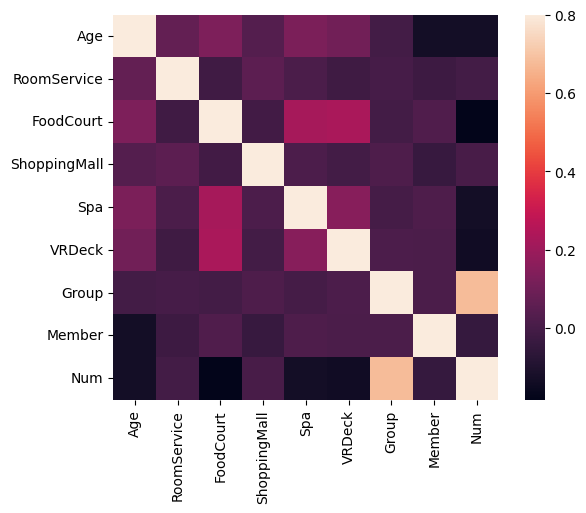

In [780]:
# correlation matrix with the new features
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Member', 'Num', 'Side']
corrmat = data[num_features].corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

In [781]:
data['Side']

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Side, Length: 8693, dtype: object

In [782]:
size_plt = []
for s in data['Side']:
    if s == 'S':
        size_plt.append(1)
    if s == 'P':
        size_plt.append(10)
    if type(s) == float:
        size_plt.append(0)

In [783]:
#Plot the distibution of Group and Num since they are the most correlated features using color to distinguish the Deck, using scatterplot, using plotly
import plotly.express as px
fig = px.scatter(data, x="Group", y="Num", color="Deck", trendline="ols", template="simple_white", size=size_plt)
fig.show()


In [784]:
# add data['Alone'] feature of all 0
data['Alone'] = np.zeros(len(data['Group']))

In [785]:
# create feature "Alone" to check if the passenger is alone or not
id = 0
numb_alone = 0
for g in data['Group']:
    # print(g)
    count = 0
    for m in data['Member'][data['Group'] == g]:
        count += 1
    if count == 1:
        # print("Alone", id)
        numb_alone += 1
        data['Alone'][id] = 1
    else:
        data["Alone"][id] = 0
    
    id += 1
data["Alone"].sum()

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/1870072605.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/1870072605.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4805.0

In [786]:
data['Deck'][data['Alone'] == 1].isna().sum()

99

In [787]:
# #Plot the distibution of Group and Num since they are the most correlated features using color to distinguish the Deck, using scatterplot, using plotly
# import plotly.express as px
# filtered_data = data[data['Alone'] == 0]
# fig = px.scatter(data[data['Alone'] == 0], x="Group", y="Num", trendline="ols",  color_discrete_map={'points': 'blue'})
# # fig = px.scatter(data[data['Alone'] == 1], x="Group", y="Num", trendline="ols",  color='blue')

# fig.show()


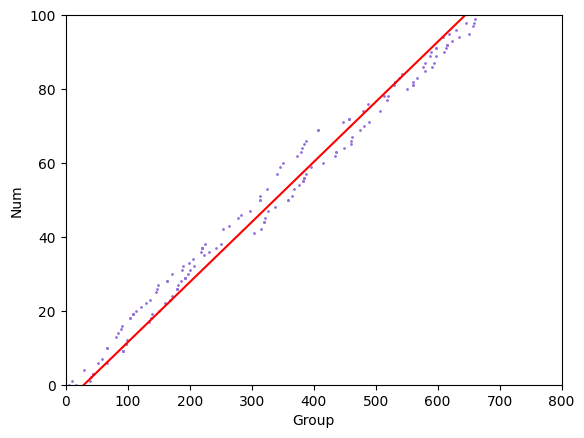

In [788]:
x = data['Group'][data['Deck'] == 'G']
y = data['Num'][data['Deck'] == 'G']

plt.scatter(x,y, color='mediumpurple', s=1)

#fit the line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.xlim(0, 800)
plt.ylim(0, 100)
plt.xlabel('Group')
plt.ylabel('Num')
plt.show()

In [789]:
# # search for a nan in the y and fill it with the value of the line
# for i in range(len(y)):
#     if np.isnan(y[i]):
#         y[i] = m*x[i] + b
#         print(y[i])

# Preprocessing

In [790]:
data.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Group  Member Deck  Num Side  Alone  
0           0.0     0.0     0.0      1       1    B  0.0    P    1.0  
1          25.0   549.0    44.0      2       1    F  0.0    S    1.0  
2           0.0  6715.0    49.0      3       1    A  0.0    S    0.0  
3         371.0  3329.0   193.0      3       2    A  0.0    S    0.0  
4         151.0   565.0     2.0      4       1    F  1.0    S    1.0

# Missing Values

In [791]:
data.isna().any()

HomePlanet       True
CryoSleep        True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Group           False
Member          False
Deck             True
Num              True
Side             True
Alone           False
dtype: bool

In [792]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

Number_missing  Percentage_missing
HomePlanet               201                2.31
CryoSleep                217                2.50
Destination              182                2.09
Age                      179                2.06
VIP                      203                2.34
RoomService              181                2.08
FoodCourt                183                2.11
ShoppingMall             208                2.39
Spa                      183                2.11
VRDeck                   188                2.16
Deck                     199                2.29
Num                      199                2.29
Side                     199                2.29

WE cannot seimply delete the missing values because we will lose a lot of data.

In [793]:
data[na_cols].isna()

HomePlanet  CryoSleep  Destination    Age    VIP  RoomService  \
0          False      False        False  False  False        False   
1          False      False        False  False  False        False   
2          False      False        False  False  False        False   
3          False      False        False  False  False        False   
4          False      False        False  False  False        False   
...          ...        ...          ...    ...    ...          ...   
8688       False      False        False  False  False        False   
8689       False      False        False  False  False        False   
8690       False      False        False  False  False        False   
8691       False      False        False  False  False        False   
8692       False      False        False  False  False        False   

      FoodCourt  ShoppingMall    Spa  VRDeck   Deck    Num   Side  
0         False         False  False   False  False  False  False  
1         False         False  False   False  False  False  False  
2         False         False  False   False  False  False  False  
3         False         False  False   False  False  False  False  
4         False         False  False   False  False  False  False  
...         ...           ...    ...     ...    ...    ...    ...  
8688      False         False  False   False  False  False  False  
8689      False         False  False   False  False  False  False  
8690      False         False  False   False  False  False  False  
8691      False         False  False   False  False  False  False  
8692      False         False  False   False  False  False  False  

[8693 rows x 13 columns]

In [794]:
# # Heatmap of missing values
# plt.figure(figsize=(12,6))
# sns.heatmap(data[na_cols].isna().T)

A passenger has 13 features. Since we saw that the maximum number of missing feature for a single passanger is 3 the percentage of missing feature is relatively low. So we choose not to eliminate entrances but instead fill the missing values. 


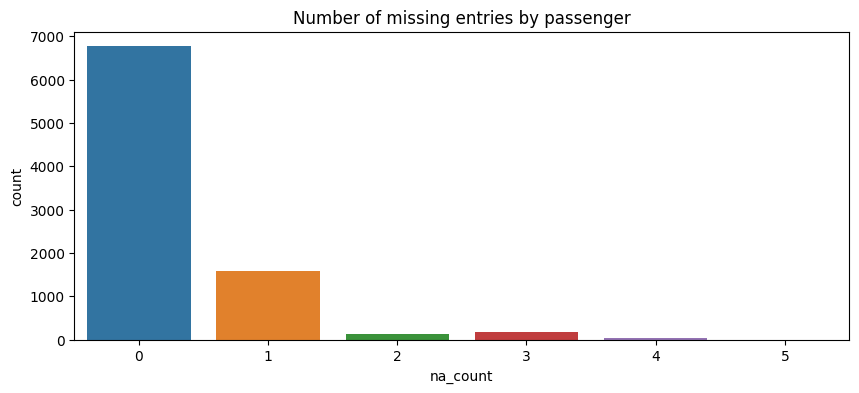

In [795]:
# Countplot of number of missing values by passenger
data['na_count']=data.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='na_count')
plt.title('Number of missing entries by passenger')
data.drop('na_count', axis=1, inplace=True)

# Fill missing values

## Gruop Member vs Age

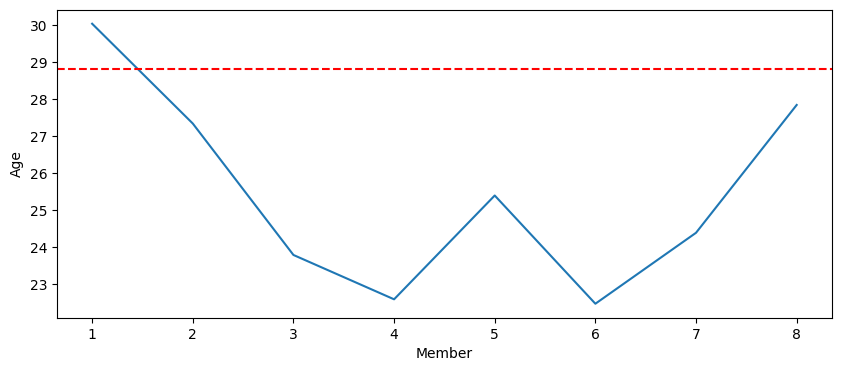

179
0


/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/1120992455.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [796]:
##  Grafico member vs Mean of age per member
mean_age = []
member = []
for m in np.unique(data['Member']):
    member.append(m)
    mean_age.append(data['Age'][data['Member'] == m].mean())


plt.figure(figsize = (10,4))
plt.plot(member,mean_age, '-')
#plot real mean age of entire dataset as line
plt.axhline(y=data['Age'].mean(), color='r', linestyle='--')
plt.xlabel('Member')
plt.ylabel('Age')
plt.show()



print(data['Age'].isna().sum())

## fillo tutti i nan di Age con la media di Age per Member
for i in range(len(data['Age'])):
    if np.isnan(data['Age'][i]):
        data['Age'][i] = mean_age[data['Member'][i]-1]

print(data['Age'].isna().sum())


## Num and HomePlanet

608.0
Density Europ 1970
Density Earth 1066


/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/3443177208.py:4: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



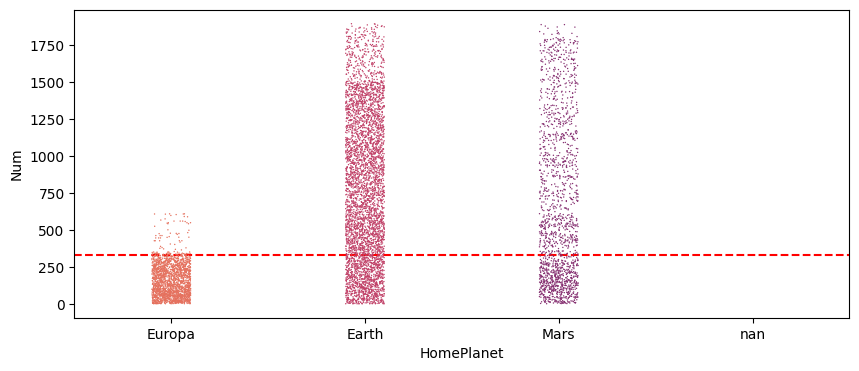

201
0


/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/3443177208.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/3443177208.py:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [797]:
## Num and HOmePlanet
#plot the distribution of the features Num vs HomePlanet using scatterplot
plt.figure(figsize = (10,4))
sns.stripplot(data=data, x="HomePlanet", y="Num", s=1, palette='flare')


# plt.scatter(data['Num'], data['HomePlanet'], s=1)
plt.xlabel('HomePlanet')
plt.ylabel('Num')
# plt.show()


# if num > tot allora gess the miss value with the remaining

#if data['Num']>max( data['Num'][data['HomePlanet'] == 'Earth']): data['Num'] = max( data['Num'][data['HomePlanet'] == 'Earth'])
if data['Num'][data['HomePlanet'] == 'Earth'].max() > data['Num'].max():
    data['Num'][data['HomePlanet'] == 'Earth'] = data['Num'].max()

#chcech the density of feature homeplanet earth if data['Num'] < max('Num' ['HomePlanet' == 'Earth'])
max_num_europa = data['Num'][data['HomePlanet'] == 'Europa'].max()
print(max_num_europa)

max_num_europa = 330

# count the number of passenger with HomePlanet == 'Europa' and Num > max_num_europa
count_eur = 0
for n in data['Num'][data['HomePlanet'] == 'Europa']:
    if n < max_num_europa:
        count_eur += 1
print("Density Europ", count_eur)

count_earth = 0
for n in data['Num'][data['HomePlanet'] == 'Earth']:
    if n < max_num_europa:
        count_earth += 1
print("Density Earth", count_earth)

#plot the orizzontal line at max_num_europa

plt.axhline(y=max_num_europa, color='r', linestyle='--')
plt.show()


#now fill the data['HomePlanet'] with Europa if data['Num'] > max_num_europa
# else fill with Earth
print(data['HomePlanet'].isna().sum())

for i in range(len(data['Num'])):
    # check if is nan, is a string otherwise
    if pd.isna(data['HomePlanet'][i]):
        if data['Num'][i] > max_num_europa:
            data['HomePlanet'][i] = 'Europa'
        else:
            data['HomePlanet'][i] = 'Earth'
            

print(data['HomePlanet'].isna().sum())

        

## ANGELO num deck

{'A': [0.011345432816467216, -2.2780532827825852], 'B': [0.035833810044064156, 0.6269908711564003], 'C': [0.03497349139023989, 1.1093915196167643], 'D': [0.030138523991481935, 5.557242557622644], 'E': [0.06491654803222259, -0.9653922677020065], 'F': [0.1993934484531681, -3.1269723777142597], 'G': [0.16261240789066003, -4.798066203007176], 'T': [0.0005541280507195021, 0.02029175300884329]}


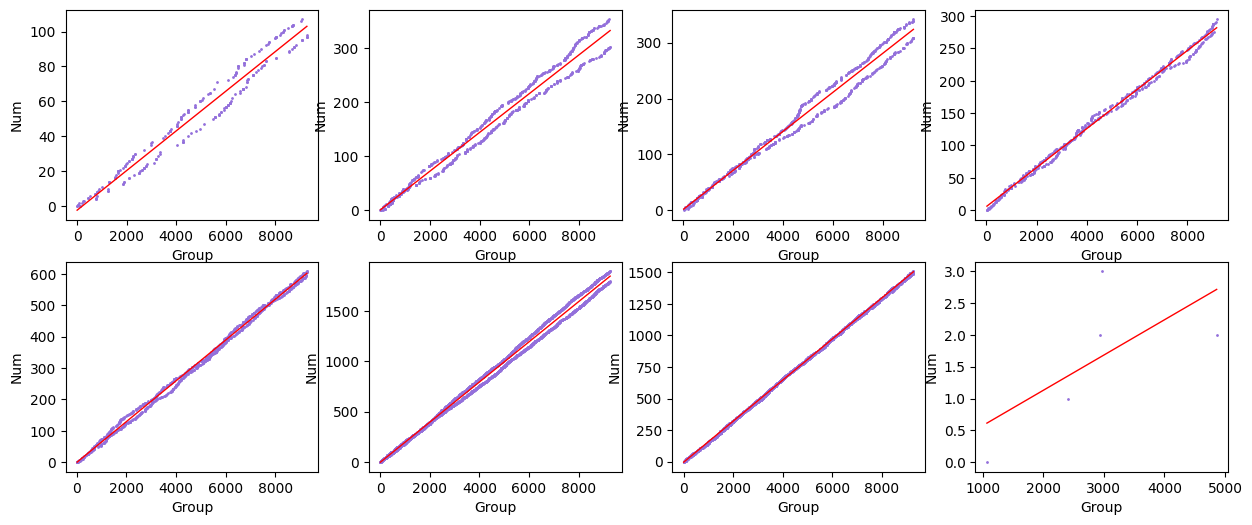

In [798]:
#creating vectors of parameters of lin
#'A':[], 'B':[], 'C':[], 'D':[], 'E':[], 'F':[], 'G':[], 'T':[]
fit_params={}
slopes=[]
inter=[]
plt.figure(figsize=(15, 6))
for i, lett in enumerate('ABCDEFGT'):
    x = data['Group'][data['Deck'] == lett]
    y = data['Num'][data['Deck'] == lett]
    plt.subplot(2, 4, i+1)
    plt.scatter(x,y, color='mediumpurple', s=1)
    #fit the line
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red', linewidth=1)
    plt.xlabel('Group')
    plt.ylabel('Num')
    #plt.show()
    #store the parameters
    fit_params[lett]=[]
    fit_params[lett].append(m)
    fit_params[lett].append(b)

print(fit_params)

In [799]:
from collections import Counter
a,b = Counter(data['Deck'][data['Group']==103]).most_common(1)[0]
print(a,b)

G 2


In [800]:
# search for a nan in the y and fill it with the value of the line
from collections import Counter
#count_gruppicontuttinonanneldeck=0


for i in range(len(data['Deck'])):
    if pd.isna(data['Deck'][i]):
        g= data['Group'][i]
        #print(data['Deck'][data['Group']==g])
        #Filling the deck and side
        #print(data['Alone'][i])
        if data['Alone'][i]==0:         #chekko in che deck sono le altre persone del gruppo
            #print('non alone')
            print(data['Deck'][data['Group']==g])
            print(data['Side'][data['Group']==g])
            deck_nonan = []
            side_nonan = []
            for deck_all in (data['Deck'][data['Group']==g]):
                if type(deck_all)!=float:
                    deck_nonan.append(deck_all)
                    
            for side_all in (data['Side'][data['Group']==g]):
                if type(side_all)!=float:
                    side_nonan.append(side_all)
               
            print(side_nonan)
            print(deck_nonan)

            if side_nonan == [] or deck_nonan == []:
                deck='F'
            else:
                counter_deck = Counter(deck_nonan)
                counter_side = Counter(side_nonan)
            
                deck, count_deck = counter_deck.most_common(1)[0]
                side, count_side = counter_side.most_common(1)[0]
            
            counter_deck = Counter(deck_nonan)
            counter_side = Counter(side_nonan)
            
            deck, count_deck = counter_deck.most_common(1)[0]
            side, count_side = counter_side.most_common(1)[0]
            
            data['Deck'][i]=deck
            data['Side'][i]=side
                
        else:                         # se da solo metto F che è il più comune
            deck ='F'
            choice=np.random.rand()
            if choice >=0.5:
                side='S'
            else:
                side='P'
            
            data['Deck'][i]=deck 
            data['Side'][i]=side
        
        
        #Filling del num
        m=fit_params[deck][0]
        b=fit_params[deck][1]
        num=int(m*g + b)
        data['Num'][i]=num
        

#print(count_gruppicontuttinonanneldeck)


103    NaN
104      B
105      B
106      B
Name: Deck, dtype: object
103    NaN
104      P
105      P
106      P
Name: Side, dtype: object
['P', 'P', 'P']
['B', 'B', 'B']
227    NaN
228      F
Name: Deck, dtype: object
227    NaN
228      S
Name: Side, dtype: object
['S']
['F']
251    NaN
252      G
Name: Deck, dtype: object
251    NaN
252      P
Name: Side, dtype: object
['P']
['G']
260    NaN
261      B
Name: Deck, dtype: object
260    NaN
261      P
Name: Side, dtype: object
['P']
['B']
313      D
314    NaN
Name: Deck, dtype: object
313      P
314    NaN
Name: Side, dtype: object
['P']
['D']
414      B
415    NaN
416      B
Name: Deck, dtype: object
414      S
415    NaN
416      S
Name: Side, dtype: object
['S', 'S']
['B', 'B']
456    NaN
457      B
Name: Deck, dtype: object
456    NaN
457      S
Name: Side, dtype: object
['S']
['B']
665    NaN
666      C
Name: Deck, dtype: object
665    NaN
666      S
Name: Side, dtype: object
['S']
['C']
677      A
678      A
679    NaN
Name: D

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/769982697.py:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/769982697.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/769982697.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipyker

We will use here the median for the numerical feature and then the mode for categorical ones.

In [801]:
data.isna().sum(axis=0)

HomePlanet        0
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Group             0
Member            0
Deck              0
Num               0
Side              0
Alone             0
dtype: int64

/var/folders/9_/9sylzz7s6t7d2tn8wfrg3r380000gn/T/ipykernel_63226/1980675782.py:3: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



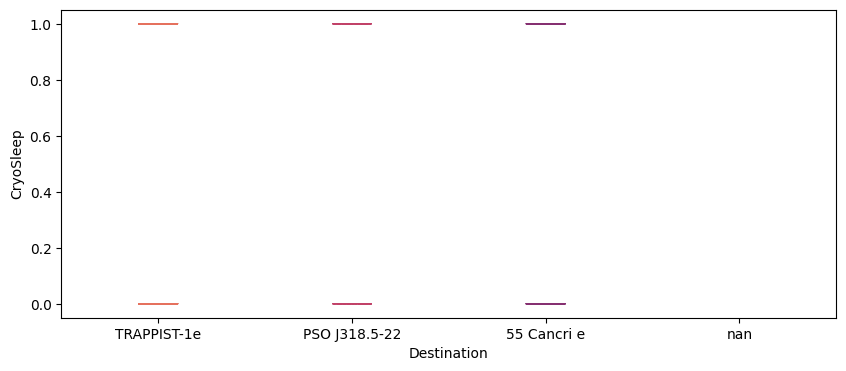

In [802]:
#scaterr cryosleep vs destination with different color for the density
plt.figure(figsize = (10,4))
sns.stripplot(data=data, x="Destination", y="CryoSleep", s=1, palette='flare')

#comuting the density of cryosleep for each destination
count_cryosleep = []
for d in data['Destination'].unique():
    count_cryosleep.append(data['CryoSleep'][data['Destination'] == d].sum())

# print(data['Destination'].unique(), count_cryosleep)


# #plot the density of cryosleep for each destination as point size
# plt.figure(figsize = (10,4))
# plt.scatter(data['Destination'].unique(), count_cryosleep, s=100, color='mediumpurple')
# plt.xlabel('Destination')
# plt.ylabel('# of CryoSleep')
# plt.show()


Numerical Data

In [803]:
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group', 'Member', 'Num']
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Alone','Side']


In [804]:
data[num_features].median()

Age               27.0
RoomService        0.0
FoodCourt          0.0
ShoppingMall       0.0
Spa                0.0
VRDeck             0.0
Group           4630.0
Member             1.0
Num              427.0
dtype: float64

In [805]:
data.isna().sum(axis=0)


HomePlanet        0
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Group             0
Member            0
Deck              0
Num               0
Side              0
Alone             0
dtype: int64

In [806]:
# Impute median (for continuous data)
# data['Age'].fillna(data['Age'].median(), inplace=True)
data['RoomService'].fillna(data['RoomService'].median(), inplace=True)
data['FoodCourt'].fillna(data['FoodCourt'].median(), inplace=True)
data['ShoppingMall'].fillna(data['ShoppingMall'].median(), inplace=True)
data['Spa'].fillna(data['Spa'].median(), inplace=True)
data['VRDeck'].fillna(data['VRDeck'].median(), inplace=True)
# data['Group'].fillna(data['Group'].median(), inplace=True)
# data['Member'].fillna(data['Member'].median(), inplace=True)
# data['Num'].fillna(data['Num'].median(), inplace=True)

Catetorical Data

In [807]:
data.isna().sum(axis=0)


HomePlanet        0
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Group             0
Member            0
Deck              0
Num               0
Side              0
Alone             0
dtype: int64

In [808]:
# Find the mode for the categorical data that are missing
print(data['CryoSleep'].mode()[0])
print(data['Destination'].mode()[0])
print(data['VIP'].mode()[0])

False
TRAPPIST-1e
False


In [809]:
# Impute most frequent category (for categorical data)
data['CryoSleep'].fillna(False, inplace=True)
data['Destination'].fillna('TRAPPIST-1e', inplace=True)
data['VIP'].fillna(False, inplace=True)

Qualitative Data

<html>
<body>

<p> <font color="red"> <b> La cabina non è stata fillat peerchè è un problema, ci sta lavorando angelo </b> </font> </p>




In [810]:
# data['Cabin'].mode()

In [811]:
# # Impute outliers (for qualitative data)
# data['Cabin'].fillna('G/734/S', inplace=True)
# data['Name'].fillna('No Name', inplace=True)


In [812]:
data.isna().sum(axis=0)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Group           0
Member          0
Deck            0
Num             0
Side            0
Alone           0
dtype: int64

Numerical Data

Drop the features that we don't need

In [813]:
# # Drop qualitative/redundant/collinear/high cardinality features
# data.drop(['PassengerId', 'Cabin', 'Name', ''], axis=1, inplace=True)
# data

## Normalization

**Min-Max Normalization**

In [814]:
# normaize features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_features] = scaler.fit_transform(data[num_features])
data.head()


HomePlanet  CryoSleep  Destination       Age    VIP  RoomService  FoodCourt  \
0     Europa      False  TRAPPIST-1e  0.493671  False     0.000000   0.000000   
1      Earth      False  TRAPPIST-1e  0.303797  False     0.007608   0.000302   
2     Europa      False  TRAPPIST-1e  0.734177   True     0.003001   0.119948   
3     Europa      False  TRAPPIST-1e  0.417722  False     0.000000   0.043035   
4      Earth      False  TRAPPIST-1e  0.202532  False     0.021149   0.002348   

   ShoppingMall       Spa    VRDeck     Group    Member Deck       Num Side  \
0      0.000000  0.000000  0.000000  0.000000  0.000000    B  0.000000    P   
1      0.001064  0.024500  0.001823  0.000108  0.000000    F  0.000000    S   
2      0.000000  0.299670  0.002030  0.000216  0.000000    A  0.000000    S   
3      0.015793  0.148563  0.007997  0.000216  0.142857    A  0.000000    S   
4      0.006428  0.025214  0.000083  0.000323  0.000000    F  0.000528    S   

   Alone  
0    1.0  
1    1.0  
2    0.0  
3    0.0  
4    1.0

In [815]:
#one hot encode the categorical features
data_encoded = pd.get_dummies(data, columns=cat_features)
data_encoded.head()


Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0  0.493671     0.000000   0.000000      0.000000  0.000000  0.000000   
1  0.303797     0.007608   0.000302      0.001064  0.024500  0.001823   
2  0.734177     0.003001   0.119948      0.000000  0.299670  0.002030   
3  0.417722     0.000000   0.043035      0.015793  0.148563  0.007997   
4  0.202532     0.021149   0.002348      0.006428  0.025214  0.000083   

      Group    Member       Num  HomePlanet_Earth  ...  Deck_C  Deck_D  \
0  0.000000  0.000000  0.000000                 0  ...       0       0   
1  0.000108  0.000000  0.000000                 1  ...       0       0   
2  0.000216  0.000000  0.000000                 0  ...       0       0   
3  0.000216  0.142857  0.000000                 0  ...       0       0   
4  0.000323  0.000000  0.000528                 1  ...       0       0   

   Deck_E  Deck_F  Deck_G  Deck_T  Alone_0.0  Alone_1.0  Side_P  Side_S  
0       0       0       0       0          0          1       1       0  
1       0       1       0       0          0          1       0       1  
2       0       0       0       0          1          0       0       1  
3       0       0       0       0          1          0       0       1  
4       0       1       0       0          0          1       0       1  

[5 rows x 31 columns]

In [816]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = Pipeline(
    [
        ("scaler", StandardScaler()), ("pca", PCA(random_state = 72))
    ] # list of steps: (name, object)
)

pipe = pipe.fit(data_encoded)

# 3 Chapter

## PCA

### PCA explaineation

*Dimensionality Reduction*

When dealing with datasets featuring numerous columns, the challenge is to visualize data in a 2D (3D) space without creating (X, Y) plots for every column pair. Dimensionality Reduction techniques help by condensing excess dimensions into a chosen, reduced representation.

*PCA (Principal Component Analysis)*

PCA is a key technique for this. It identifies a new dataset representation capturing a fraction of the original variance, albeit with some loss. PCA finds directions where the dataset varies the most—designated as Principal Components (PCs). PC1 is the direction with the most variance, PC2 follows, and so on. These become features in our reduced space, also seen as optimal linear combinations of original features.




In [817]:
x_pc = pd.DataFrame(pipe.transform(data_encoded), columns = [f"x{i+1}" for i in range(pipe.named_steps["pca"].n_components_)])
x_pc.head()


x1        x2        x3        x4        x5        x6        x7  \
0  1.642597  0.880341  1.058359  0.057268 -1.754398 -1.906448 -1.263606   
1 -1.156656  1.297806  0.606421 -1.677778  0.676535 -0.490983 -1.050606   
2  6.599399  3.512989  2.379436  1.095371  0.987138  6.668426 -3.818886   
3  3.543241  0.614254 -0.102425 -0.817704  1.780401 -0.748116 -1.583908   
4 -1.213399  1.312973  0.486222 -1.619644  0.761770 -0.471057 -1.043378   

         x8        x9       x10  ...       x22       x23       x24  \
0 -0.551747 -1.591070  0.846753  ... -1.435852 -0.244977  0.684457   
1  0.674301 -2.161073 -0.651772  ...  0.408839  0.206620 -0.355006   
2 -1.014647 -2.136979 -0.272396  ...  0.771994 -0.271304  0.862894   
3 -0.022688 -1.532102  0.062645  ... -0.065543 -0.234884  0.877709   
4  0.822137 -2.111578 -0.617127  ...  0.554785  0.206572 -0.351906   

            x25           x26           x27           x28           x29  \
0 -2.665977e-15 -1.370114e-15 -3.388227e-15  9.390657e-16 -9.119167e-16   
1  1.981703e-16 -1.154109e-15 -2.528782e-15 -2.633427e-16  1.545686e-16   
2  1.747712e-15  1.764780e-15  4.410645e-16  6.584261e-15  5.958086e-15   
3 -4.172228e-16  1.764780e-15 -1.335292e-15  2.254392e-15 -1.591431e-15   
4 -2.387427e-17 -1.265131e-15 -2.195715e-15 -2.078316e-16  1.545686e-16   

            x30           x31  
0 -2.154622e-16  5.996847e-16  
1  2.426236e-16 -1.650516e-16  
2  1.533258e-15  3.900599e-16  
3  8.983490e-16  1.680153e-16  
4  2.426236e-16 -1.650516e-16  

[5 rows x 31 columns]

In [832]:
fig = px.scatter_3d(
    x_pc, x = "x1", y = "x2", z="x3", color=label, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()

/opt/homebrew/lib/python3.11/site-packages/matplotlib/transforms.py:762: ComplexWarning:

Casting complex values to real discards the imaginary part

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



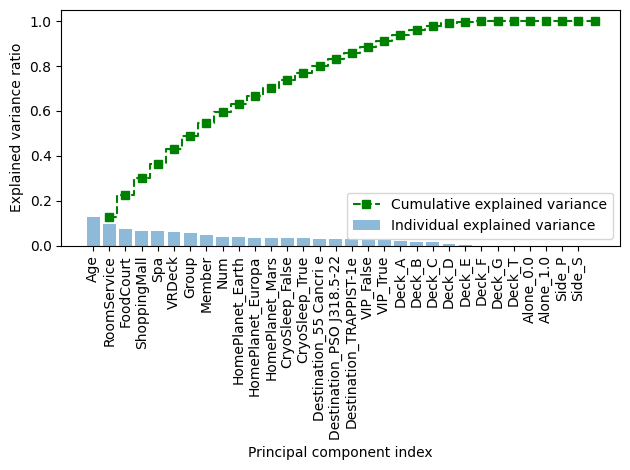

In [819]:
#impirt preprocessor.fit_transform
from sklearn import preprocessing
preprocessor = preprocessing.StandardScaler()
cov_mat = np.cov(preprocessor.fit_transform(data_encoded,label).T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)

var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

plt.bar(data_encoded.keys(), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
#rotate the xticks
plt.xticks(rotation=90)
plt.step(range(1, len(var_exp)+1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance'
                     , color = 'green', linestyle = '--', marker = 's')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show();

## Clustering

### DBSCAN

In [820]:
# try to clusterize data using the density based clustering algorithm DBSCAN the pca data
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=4, min_samples=10).fit(x_pc)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pc, labels))


# #############################################################################
# Plot result using plotly
import plotly.express as px
fig = px.scatter_3d(
    x_pc, x = "x1", y = "x2", z="x3", color=labels, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()


[ 0  1 -1 ...  1  1  1]
Number of clusters: 12
Estimated number of clusters: 12


Silhouette Coefficient: 0.153


Detect the best number of clusters

In [821]:
# compute siluette score in function of eps
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

eps = np.linspace(1, 10, 10)
min_samples = np.linspace(1, 10, 10)
#meshgrid
eps, min_samples = np.meshgrid(eps, min_samples)
siluette = []

for i in range(len(eps)):
    for j in range(len(min_samples)):
        db = DBSCAN(eps=eps[i][j], min_samples=int(min_samples[i][j])).fit(x_pc)
        labels = db.labels_
        siluette.append(metrics.silhouette_score(x_pc, labels))
        print(i,j)

siluette = np.array(siluette)
# siluette = siluette.reshape(10,10)
print(siluette)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
[ 0.03494475  0.22859762  0.00815613  0.06339675  0.23166663  0.24218847
  0.42816413  0.43648099  0.43701441  0.63881838 -0.05102033  0.22214161
  0.04818722  0.13575342  0.24831259  0.25312314  0.43692964  0.43973004
  0.43944484  0.72104269 -0.03512658  0.21642029  0.07542697  0.14594765
  0.2525516   0.25386372  0.43817692  0.43985098  0.43957411  0.72104269
 -0.01928811  0.20501832  0.09966617  0.14815402  0.25343365  0.25395579
  0.43817692  0.43985098  0.43966235  0.71242487 -0.02415526  0.19310231
  0.10527106  0.14824656  0.25229678  0.25509262  0.43817692  0.43985098
  0.43966235  0.

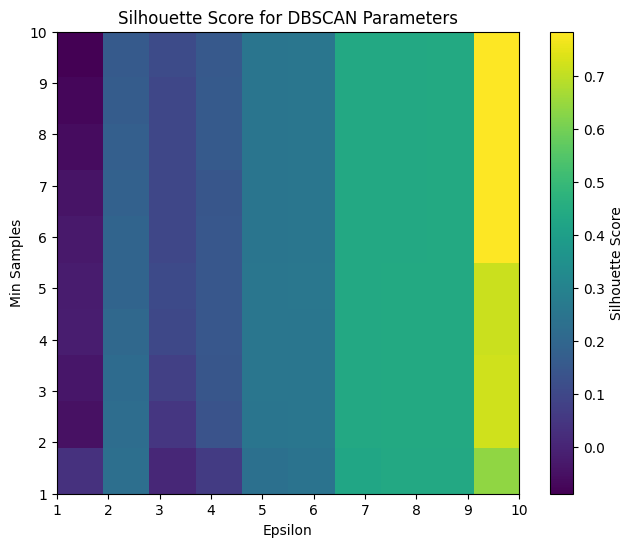

In [822]:
import matplotlib.pyplot as plt

# Reshape silhouette scores to match the meshgrid
silhouette_matrix = siluette.reshape(eps.shape)

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.imshow(silhouette_matrix, cmap='viridis', origin='lower', extent=(1, 10, 1, 10))
plt.colorbar(label='Silhouette Score')
plt.title('Silhouette Score for DBSCAN Parameters')
plt.xlabel('Epsilon')
plt.ylabel('Min Samples')
plt.show()


### K-Means

In [823]:
# cluster the data using KMeans, the pca data
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute KMeans
km = KMeans(n_clusters=3, random_state=0).fit(x_pc)
labels = km.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pc, labels))


# #############################################################################
# Plot result using plotly
import plotly.express as px
fig = px.scatter_3d(
    x_pc, x = "x1", y = "x2", z="x3", color=labels, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()



/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[2 1 2 ... 0 2 2]
Number of clusters: 3
Estimated number of clusters: 3
Silhouette Coefficient: 0.095


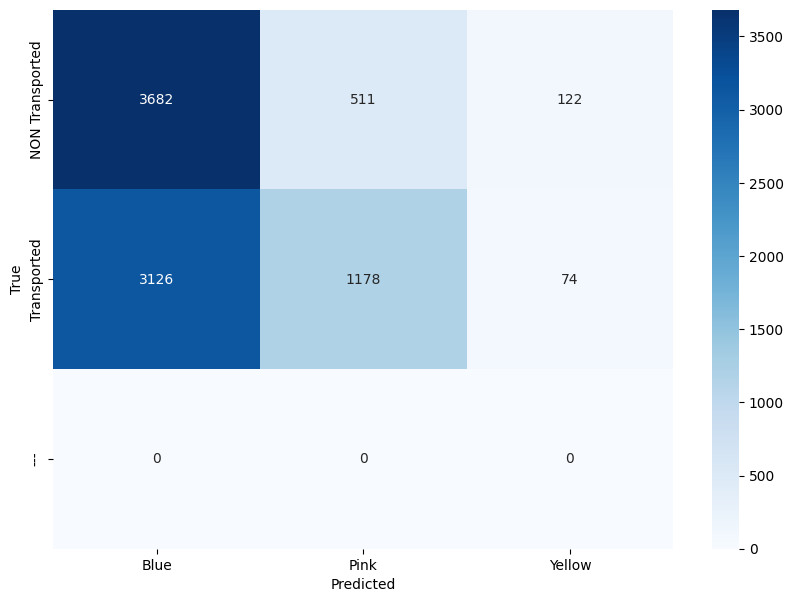

In [834]:
# compute cofusion matrix using the labels of the cluster and the true labels
from sklearn.metrics import confusion_matrix
confusion_matrix(label, labels)

#plot the confusion matrix
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(label, labels), annot=True, cmap='Blues', fmt='g')
# change label xticks
plt.xticks(np.arange(0.5,3.5,1), ('Blue', 'Pink', 'Yellow'))
plt.yticks(np.arange(0.5,3.5,1), ('NON Transported', 'Transported', '---'))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [824]:
# valuate k means using calinski harabasz score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

k = np.linspace(2, 17, 15)
#meshgrid
k = k.astype(int)
calinski = []

for i in range(len(k)):
    km = KMeans(n_clusters=k[i], random_state=0).fit(x_pc)
    labels = km.labels_
    calinski.append(metrics.calinski_harabasz_score(x_pc, labels))
    print(i)

calinski = np.array(calinski)
# calinski = calinski.reshape(10,10)
print(calinski)

0


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1
2
3
4


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



5
6
7


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



8
9
10


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



11
12
13


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



14
[1034.22529309  905.72029488  813.33935929  842.29934463  776.94830536
  724.68456063  694.63392548  712.33848637  717.95861803  722.19476939
  717.86276916  712.0327436   693.19025705  673.53954243  646.89267361]


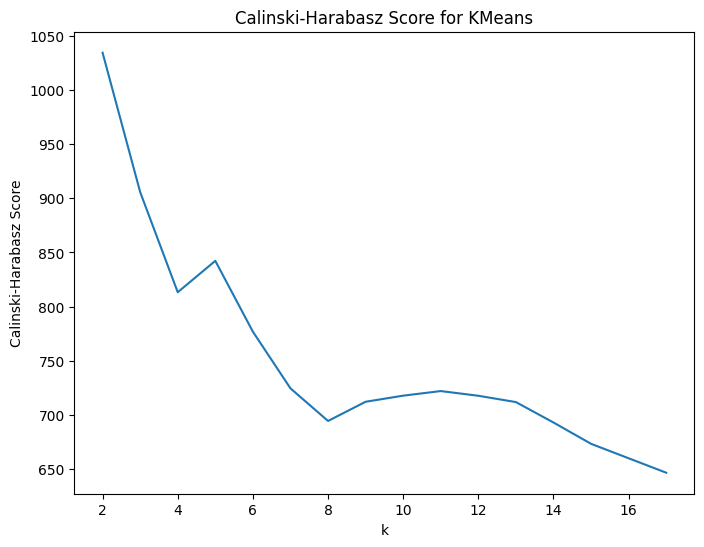

In [825]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape Calinski-Harabasz scores to match the meshgrid
calinski_matrix = calinski.reshape((len(k), 1))

# Plotting the Calinski-Harabasz scores as scatter plot
plt.figure(figsize=(8, 6))
plt.plot(k, calinski_matrix)
plt.title('Calinski-Harabasz Score for KMeans')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.show()



### Gaussian scanning

In [827]:
#do a gaussian scanning of the pca
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(x_pc)
labels = gm.predict(x_pc)
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pc, labels))


# #############################################################################
# Plot result using plotly
import plotly.express as px
fig = px.scatter_3d(
    x_pc, x = "x1", y = "x2", z="x3", color=labels, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'},
    width=800, height=500
)
fig.show()



[2 1 2 ... 0 1 1]
Number of clusters: 3
Estimated number of clusters: 3
Silhouette Coefficient: 0.092


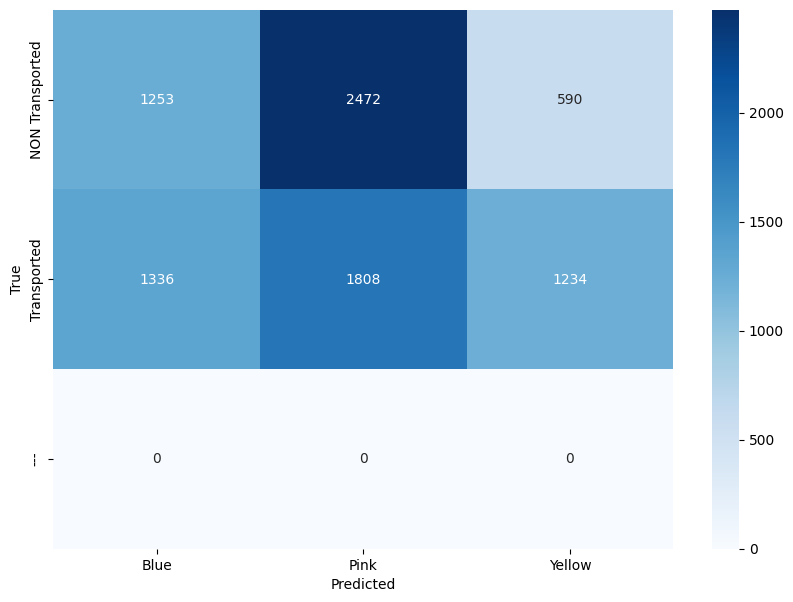

In [828]:
# compute cofusion matrix using the labels of the cluster and the true labels
from sklearn.metrics import confusion_matrix
confusion_matrix(label, labels)

#plot the confusion matrix
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(label, labels), annot=True, cmap='Blues', fmt='g')
# change label xticks
plt.xticks(np.arange(0.5,3.5,1), ('Blue', 'Pink', 'Yellow'))
plt.yticks(np.arange(0.5,3.5,1), ('NON Transported', 'Transported', '---'))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


0
1
2
3
4
5
6
7
8
[0.22370775 0.09158782 0.09240509 0.09826614 0.11682442 0.13516244
 0.12441265 0.1435523  0.13525865]


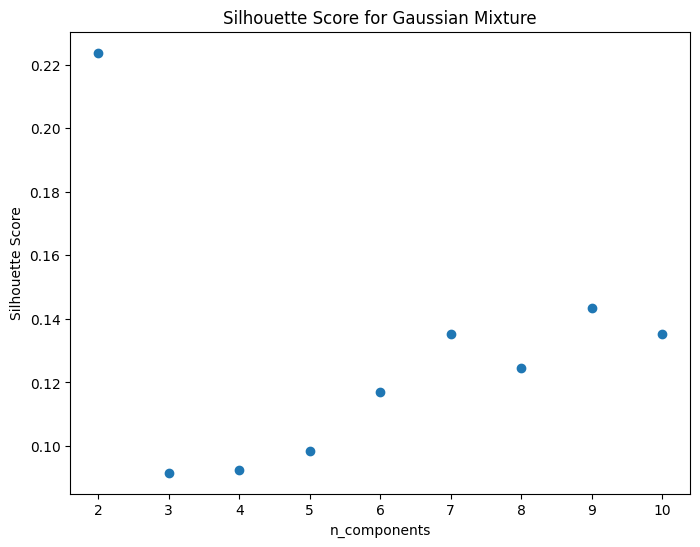

In [829]:
# compute siluette score in function of n_components
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

n_components = np.linspace(2, 10, 9)

siluette = []

for i in range(len(n_components)):
    gm = GaussianMixture(n_components=int(n_components[i]), random_state=0).fit(x_pc)
    labels = gm.predict(x_pc)
    siluette.append(metrics.silhouette_score(x_pc, labels))
    print(i)

siluette = np.array(siluette)
# siluette = siluette.reshape(10,10)
print(siluette)

import matplotlib.pyplot as plt

# Reshape silhouette scores to match the meshgrid
silhouette_matrix = siluette.reshape(n_components.shape)

# Plotting the silhouette scores
plt.figure(figsize=(8, 6))
plt.scatter(n_components, silhouette_matrix)
plt.title('Silhouette Score for Gaussian Mixture')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')
plt.show()


### Agglomerative clustering

In [830]:
# hierarcical clustering on pca
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Compute AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3).fit(x_pc)
labels = ac.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters_)
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x_pc, labels))


# #############################################################################
# Plot result using plotly
import plotly.express as px

fig = px.scatter_3d(
      x_pc, x = "x1", y = "x2", z="x3", color=labels, size=0.1*np.ones(len(data_encoded)), opacity = 1, size_max=5,
      title=f'Total Explained Variance: {total_var:.2f}%',
      labels={'0': 'PC 1', '1': 'PC 2'},
      width=800, height=500
      )
fig.show()


[1 0 2 ... 0 0 0]
Number of clusters: 3
Estimated number of clusters: 3
Silhouette Coefficient: 0.209


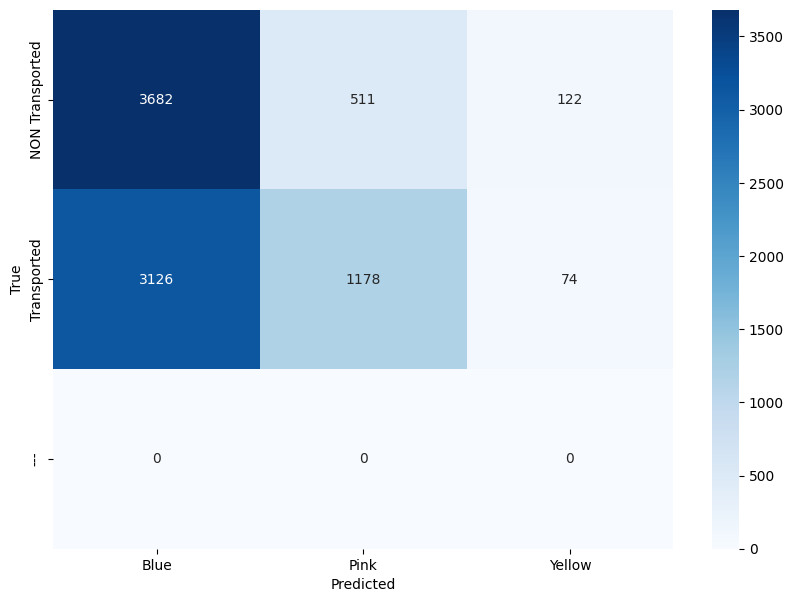

In [831]:
# compute cofusion matrix using the labels of the cluster and the true labels
from sklearn.metrics import confusion_matrix
confusion_matrix(label, labels)

#plot the confusion matrix
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(label, labels), annot=True, cmap='Blues', fmt='g')
# change label xticks
plt.xticks(np.arange(0.5,3.5,1), ('Blue', 'Pink', 'Yellow'))
plt.yticks(np.arange(0.5,3.5,1), ('NON Transported', 'Transported', '---'))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
